# Taller computacional Robótica

## Descripción del ejercicio

Este es el robot CZ10-01 de Nachi, el cual tiene 6 grados de libertad (todos de revolución). Este robot se muestra en las siguientes figuras (tomadas del [manual](https://www.nachirobotics.com/wp-content/uploads/2018/10/NRS-CZ10-StandardSpecification.pdf)). Un video de la operación de este robot se encuentra [aquí](https://www.youtube.com/watch?v=c9F3_3yMEOk). Utilizar las dimensiones mostradas en las figuras siguientes (Ver Fig. \ref{fig:robot}) y el sistema mostrado para la base.

**Nota**: al hacer las asignaciones de sistemas de referencia, no es necesario indicar los tres ejes. Por facilidad, se puede obviar algún eje (como el eje y), siempre que sea directo obtenerlo a partir de los otros dos ejes.

![Descripción del Robot CZ10-01](./ROBOT.png)

*Fig. 1: Descripción del Robot CZ10-01*

- (1 unidad) Dibujar los ejes en la vista lateral del robot.
- (2 unidades) Realizar la tabla de Denavit-Hatenberg con la herramienta Robotic-Toolbox.
- (1 unidad) Comprobar que con la posición estatíca, la posición final sea la que se muestra en el dibujo (895, 1015, -199).
- (2 unidades) Descubrir dos movimientos artículares $q = (q_0, q_1, q_2, q_3, q_4, q_5, q_6)$ que den como resultado la coordenada del efector final en: (-560, 100, -150).

## Criterio de calificación

- Grupos máximo de 3 personas
- Debe entregar un colab notebook compartido y 100\% ejecutable
- Incluya buenas descripciones textuales de cómo resolvió el ejercicio.
- Utilizar solo la herramienta de Robotics toolbox.
- Buenas prácticas de código serán tenidas en cuenta.

## Solución

In [20]:
import roboticstoolbox as rtb
import numpy as np

customized_robot = rtb.DHRobot(
    [
        rtb.RevoluteDH(d =.310, a=-.100, alpha=-np.pi/2, offset=np.pi),
        rtb.RevoluteDH(a =.600, offset=-np.pi/2),
        rtb.RevoluteDH(a =.105, alpha=np.pi/2),
        rtb.RevoluteDH(d =.591, alpha=np.pi/2),
        rtb.RevoluteDH(offset=np.pi, d=.199, alpha=np.pi/2),
        rtb.RevoluteDH(d=.204),
    ], name="CZ10-01")

customized_robot

DHRobot: CZ10-01, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬───────┬───────┬────────┐
│    θⱼ     │  dⱼ   │  aⱼ   │   ⍺ⱼ   │
├───────────┼───────┼───────┼────────┤
│ q1 + 180° │  0.31 │  -0.1 │ -90.0° │
│ q2 - 90°  │     0 │   0.6 │   0.0° │
│ q3        │     0 │ 0.105 │  90.0° │
│ q4        │ 0.591 │     0 │  90.0° │
│ q5 + 180° │ 0.199 │     0 │  90.0° │
│ q6        │ 0.204 │     0 │   0.0° │
└───────────┴───────┴───────┴────────┘

┌─┬──┐
└─┴──┘

## Posición del efector final con sus variables en 0's

In [21]:
T = customized_robot.fkine([0,0,0,0,0,0])
print(T)

   0         0         1         0.895     
   0         1         0         0.199     
  -1         0         0         1.015     
   0         0         0         1         



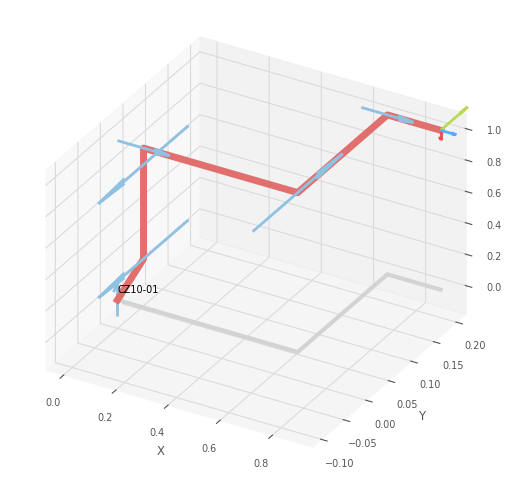

PyPlot3D backend, t = 0.05, scene:
  CZ10-01

<Figure size 640x480 with 0 Axes>

In [22]:
customized_robot.plot(customized_robot.q)

## Iteraciones para encontrar posición deseada

In [23]:
import numpy as np
from scipy.spatial.distance import euclidean

# target coordinates
target = np.array([-.560, .100, -.150])

# grid parameters
num_points = 10  # number of points in the grid for each angle
angle_range = (-np.pi, np.pi)  # range of values for each angle

# tolerance for the distance
tolerance = 1e-2

# create grid
angles_grid = np.meshgrid(*[np.linspace(*angle_range, num_points) for _ in range(6)])

# flatten the grid
angles_grid = np.reshape(angles_grid, (6, -1)).T

# initialize best distance and angles
best_distance = np.inf
best_angles = None

# iterate over all combinations of angles
for angles in angles_grid:
    # compute forward kinematics
    T = customized_robot.fkine(angles)
    
    # extract current position
    current_position = np.array(T)[:3,3]
    
    # compute distance to target
    distance = euclidean(current_position, target)
    
    # update best distance and angles if necessary
    if distance < best_distance:
        best_distance = distance
        best_angles = angles
    
    # check if target is reached
    if best_distance < tolerance:
        print("Target reached")
        break

print(f"Best angles: {best_angles}")
print(f"Best distance: {best_distance}")

Best angles: [ 3.14159265 -1.04719755 -1.04719755  1.04719755 -1.04719755 -3.14159265]
Best distance: 0.059823215979733245


In [25]:
T2 = customized_robot.fkine([3.14159265, 
                             -1.04719755, -1.04719755,  
                             1.04719755, -1.04719755,
                             -3.14159265])
print(T2)

  -0.6495    0.75     -0.125    -0.5898    
   0.433     0.5       0.75      0.0535    
   0.625     0.433    -0.6495   -0.173     
   0         0         0         1         

